In [1]:
import os
import sys
import importlib
import tqdm

import itertools as it
# add project modules to the path
path_to_module = os.path.abspath(os.path.join(os.getcwd(), "..", "src/"))
sys.path.append(path_to_module)

import src.models.train_model as train_model
import src.visualization.visualize as vis

%matplotlib inline

In [2]:
importlib.reload(vis)

<module 'src.visualization.visualize' from '/home/edd/Documents/Projects/minst-ensemble/src/visualization/visualize.py'>

loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:   0%|          | 0/4 [00:00<?, ?it/s]2019-09-09 13:47:49,474 - src.models.train_model - INFO - loading X_train in file /home/edd/Documents/Projects/minst-ensemble/data/processed/X_train_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  25%|██▌       | 1/4 [00:05<00:15,  5.20s/it]2019-09-09 13:47:54,673 - src.models.train_model - INFO - loading X_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/X_test_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  50%|█████     | 2/4 [00:05<00:07,  3.88s/it]2019-09-09 13:47:55,468 - src.models.train_model - INFO - loading y_train in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_train_scaled.npy
2019-09-09 13:47:55,510 - src.models.train_model - INFO - loading y_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_test_scaled.npy


  scaled data
 explained varience elbow:67
 explained varience ratio knee:184


loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  25%|██▌       | 1/4 [00:03<00:11,  3.91s/it]2019-09-09 13:48:08,821 - src.models.train_model - INFO - loading X_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/X_test_blurred_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  50%|█████     | 2/4 [00:04<00:05,  2.93s/it]2019-09-09 13:48:09,460 - src.models.train_model - INFO - loading y_train in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_train_blurred_scaled.npy
2019-09-09 13:48:09,475 - src.models.train_model - INFO - loading y_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_test_blurred_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:   0%|          | 0/4 [00:00<?, ?it/s]2019-09-09 

 _blurred scaled data
 explained varience elbow:66
 explained varience ratio knee:96


loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  25%|██▌       | 1/4 [00:19<00:58, 19.54s/it]2019-09-09 13:48:38,195 - src.models.train_model - INFO - loading X_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/X_test_augmented_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  50%|█████     | 2/4 [00:20<00:27, 13.87s/it]2019-09-09 13:48:38,853 - src.models.train_model - INFO - loading y_train in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_train_augmented_scaled.npy
2019-09-09 13:48:38,869 - src.models.train_model - INFO - loading y_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_test_augmented_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed: 100%|██████████| 4/4 [00:20<00:00,  5.06s/it]
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:   0%|          | 0/4 [00:00<?, ?it/s]2019-

_augmented  scaled data
 explained varience elbow:60
 explained varience ratio knee:140


loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  25%|██▌       | 1/4 [00:19<00:58, 19.48s/it]2019-09-09 13:49:47,771 - src.models.train_model - INFO - loading X_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/X_test_augmented_blurred_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed:  50%|█████     | 2/4 [00:20<00:27, 13.84s/it]2019-09-09 13:49:48,435 - src.models.train_model - INFO - loading y_train in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_train_augmented_blurred_scaled.npy
2019-09-09 13:49:48,456 - src.models.train_model - INFO - loading y_test in file /home/edd/Documents/Projects/minst-ensemble/data/processed/y_test_augmented_blurred_scaled.npy
loading files from /home/edd/Documents/Projects/minst-ensemble/data/processed: 100%|██████████| 4/4 [00:20<00:00,  5.05s/it]


_augmented _blurred scaled data
 explained varience elbow:58
 explained varience ratio knee:86



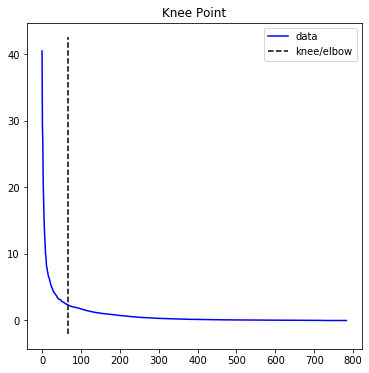

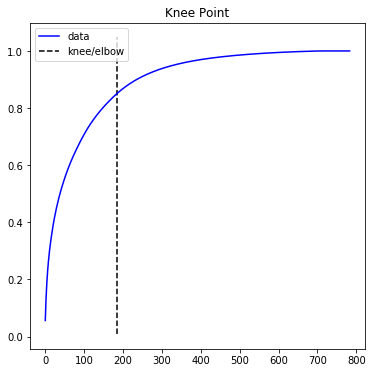

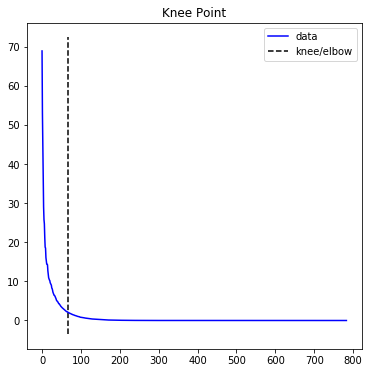

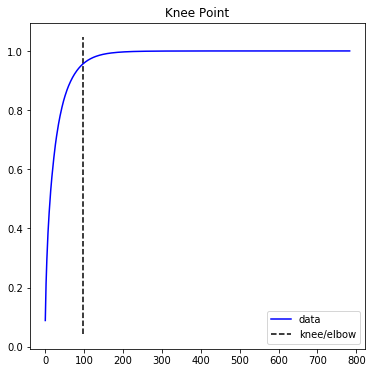

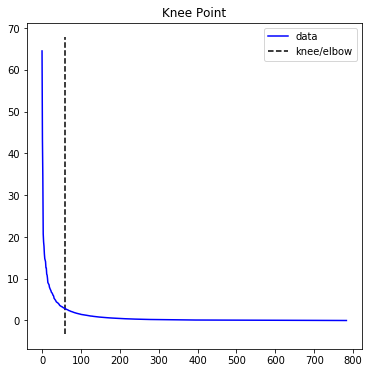

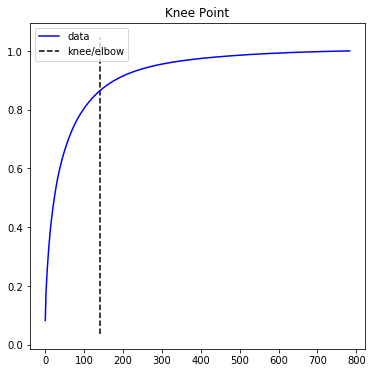

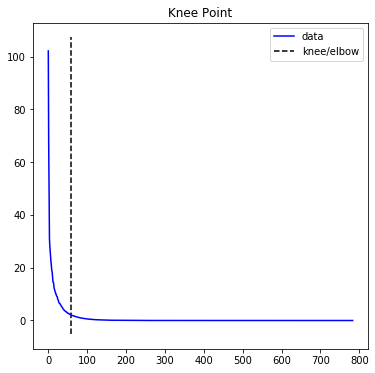

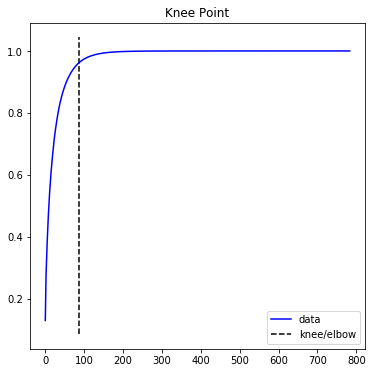

In [3]:
for augmented, blurred in tqdm.tqdm_notebook(it.product(["", "_augmented"], ["", "_blurred"])):
    
    data_dict = train_model.load_processed_data(file_path=os.path.abspath(os.path.join(os.getcwd(), "..","data/processed")),
                                            augmented_suffix=augmented,
                                            blurred_suffix=blurred)

    var, ex_var = vis.find_pca_knee(data_dict["X_train"])
    print(f"{augmented} {blurred} scaled data\n explained varience elbow:{var.elbow}\n explained varience ratio knee:{ex_var.knee}")
    var.plot_knee()
    ex_var.plot_knee()

It is interesting that the more preprocessing we do, the more we can condense the data. This reduces the number of dimensions on t